In [31]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns

In [32]:
# Shortened the process into a loop for pulling Stock Data
stockstring = ['SPY', 'QQQ', 'VTI', 'XLK', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
stockstring_expl = ['SPY - S&P500 ETF', 'QQQ - NASDAQ-100 Index', 'VTI - Vanguard Total Stock Market Index Fund', 'XLK - Technology Select Sector SPDR Fund', 'XLY - Consumer Cyclical/Consumer Discretionary', 'XLP - Consumer Defensive/Consumer Staples', 'XLV - Healthcare', 'XLI - Industrials', 'XLF - Financials', 'VNQ - Real Estate', 'XLE - Energy', 'XLU - Utilities']

start = '2012-01-01'
end = '2022-01-01'

stockslist = {}
for x in stockstring:
    stockslist[x] = pdr.get_data_yahoo(x, start=start, end=end)

#Create Individual DataFrame Variables for each Stock
SPY, QQQ, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU = [stockslist[x] for x in stockstring]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
# Add a array of those stock sybmols for later loops.
stockslist1 = [VTI, QQQ, SPY, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU]
tickers1 = ['SPY', 'QQQ', 'VTI']

In [34]:
# Reset the index for all Stock Ticker DataFrames.
for xyz in stockslist1:
    xyz.reset_index(inplace=True)

In [35]:
# Adding a Column Called Ticker to Each DataFrame using the Tickers in our Libraries above.
for xy, ticker in zip(stockslist1, stockstring):
    xy["Ticker"] = ticker

In [36]:
# Create a Column called PercentChange that tracks progress of each ETF over time.
for o in stockslist1:
    stock_pct_change = o['Close'].pct_change()
    o["PercentChange"] = (stock_pct_change.add(1).cumprod().subtract(1))*100
    o.fillna(0, inplace=True)

In [37]:
# Generate the Rate of Return for all stock ETF tickers we have using the Rate of Return formula.
SPY_end_price = SPY.Close.iloc[-1]
SPY_start_price = SPY.Close.iloc[0]
SPY_10_year_return = ((SPY_end_price / SPY_start_price - 1) * 100)/10
#5 year return calculation
SPY_5_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
SPY_3_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
SPY_1_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-252] - 1) * 100)
QQQ_end_price = QQQ.Close.iloc[-1]
QQQ_start_price = QQQ.Close.iloc[0]
QQQ_10_year_return = ((QQQ_end_price / QQQ_start_price - 1) * 100)/10
#5 year return calculation
QQQ_5_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
QQQ_3_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
QQQ_1_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-252] - 1) * 100)
# Do the same for XLK
VTI_end_price = VTI.Close.iloc[-1]
VTI_start_price = VTI.Close.iloc[0]
VTI_10_year_return = ((VTI_end_price / VTI_start_price - 1) * 100)/10
#5 year return calculation
VTI_5_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
VTI_3_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
VTI_1_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-252] - 1) * 100)
# Do the same for XLK
XLK_end_price = XLK.Close.iloc[-1]
XLK_start_price = XLK.Close.iloc[0]
XLK_10_year_return = ((XLK_end_price / XLK_start_price - 1) * 100)/10
#5 year return calculation
XLK_5_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLK_3_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLK_1_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-252] - 1) * 100)
# Do the same for XLY
XLY_end_price = XLY.Close.iloc[-1]
XLY_start_price = XLY.Close.iloc[0]
XLY_10_year_return = ((XLY_end_price / XLY_start_price - 1) * 100)/10
#5 year return calculation
XLY_5_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLY_3_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLY_1_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-252] - 1) * 100)
#Do the same for XLP
XLP_end_price = XLP.Close.iloc[-1]
XLP_start_price = XLP.Close.iloc[0]
XLP_10_year_return = ((XLP_end_price / XLP_start_price - 1) * 100)/10
#5 year return calculation
XLP_5_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLP_3_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLP_1_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-252] - 1) * 100)
#Do the same for XLV
XLV_end_price = XLV.Close.iloc[-1]
XLV_start_price = XLV.Close.iloc[0]
XLV_10_year_return = ((XLV_end_price / XLV_start_price - 1) * 100)/10
#5 year return calculation
XLV_5_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLV_3_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLV_1_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-252] - 1) * 100)
# Do the same for XLI
XLI_end_price = XLI.Close.iloc[-1]
XLI_start_price = XLI.Close.iloc[0]
XLI_10_year_return = ((XLI_end_price / XLI_start_price - 1) * 100)/10
#5 year return calculation
XLI_5_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLI_3_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLI_1_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-252] - 1) * 100)
# Do the same for XLF
XLF_end_price = XLF.Close.iloc[-1]
XLF_start_price = XLF.Close.iloc[0]
XLF_10_year_return = ((XLF_end_price / XLF_start_price - 1) * 100)/10
#5 year return calculation
XLF_5_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLF_3_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLF_1_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-252] - 1) * 100)
# Do the same for VNQ
VNQ_end_price = VNQ.Close.iloc[-1]
VNQ_start_price = VNQ.Close.iloc[0]
VNQ_10_year_return = ((VNQ_end_price / VNQ_start_price - 1) * 100)/10
#5 year return calculation
VNQ_5_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
VNQ_3_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
VNQ_1_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-252] - 1) * 100)
# Do the same for VNQ
XLE_end_price = XLE.Close.iloc[-1]
XLE_start_price = XLE.Close.iloc[0]
XLE_10_year_return = ((XLE_end_price / XLE_start_price - 1) * 100)/10
#5 year return calculation
XLE_5_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLE_3_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLE_1_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-252] - 1) * 100)
# Do the same for XLU
XLU_end_price = XLU.Close.iloc[-1]
XLU_start_price = XLU.Close.iloc[0]
XLU_10_year_return = ((XLU_end_price / XLU_start_price - 1) * 100)/10
#5 year return calculation
XLU_5_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLU_3_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLU_1_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-252] - 1) * 100)

In [38]:
# Make a DataFrame for the returns for 10,5,3,1 years for all Tickers.
returns_10_5_3_1 = pd.DataFrame({'10 Year Yearly Rate of Return': [SPY_10_year_return, QQQ_10_year_return, VTI_10_year_return, XLK_10_year_return, XLY_10_year_return, XLP_10_year_return, XLV_10_year_return, XLI_10_year_return, XLF_10_year_return, VNQ_10_year_return, XLE_10_year_return, XLU_10_year_return],
                        '5 Year Yearly Rate of Return': [SPY_5_year_return, QQQ_5_year_return, VTI_5_year_return, XLK_5_year_return, XLY_5_year_return, XLP_5_year_return, XLV_5_year_return, XLI_5_year_return, XLF_5_year_return, VNQ_5_year_return, XLE_5_year_return, XLU_5_year_return],
                        '3 Year Yearly Rate of Return': [SPY_3_year_return, QQQ_3_year_return, VTI_3_year_return, XLK_3_year_return, XLY_3_year_return, XLP_3_year_return, XLV_3_year_return, XLI_3_year_return, XLF_3_year_return, VNQ_3_year_return, XLE_3_year_return, XLU_3_year_return],
                        '1 Year Yearly Rate of Return': [SPY_1_year_return, QQQ_1_year_return, VTI_1_year_return, XLK_1_year_return, XLY_1_year_return, XLP_1_year_return, XLV_1_year_return, XLI_1_year_return, XLF_1_year_return, VNQ_1_year_return, XLE_1_year_return, XLU_1_year_return]})

returns_10_5_3_1.index = ['SPY', 'QQQ', 'VTI', 'XLK', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']

returns_10_5_3_1.head(12)

,10 Year Yearly Rate of Return,5 Year Yearly Rate of Return,3 Year Yearly Rate of Return,1 Year Yearly Rate of Return
SPY,27.251764,22.496309,31.496114,28.788736
QQQ,59.920913,47.159013,55.183996,28.625007
VTI,27.024997,21.873049,31.169354,25.835205
XLK,57.365362,51.906531,65.081789,35.942137
XLY,41.954259,30.230958,36.489073,28.239873
XLP,13.755392,9.824019,17.878729,15.572541
XLV,30.093911,20.873221,22.930393,24.736612
XLI,20.678455,14.011570,22.855927,22.451097
XLF,26.034896,13.591397,22.103918,34.284730
VNQ,9.834159,8.113414,19.307561,41.182919


In [39]:
# Merge all the ETFs into a one DataFrame for later use for our charting.
data = pd.concat(stockslist1)
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
86,2012-05-07 00:00:00-04:00,64.309998,65.070000,64.290001,64.760002,58.467609,50267800,QQQ,13.813709
1979,2019-11-13 00:00:00-05:00,61.740002,62.570000,61.660000,62.430000,56.313454,16796900,XLU,76.655348
2352,2021-05-10 00:00:00-04:00,422.500000,422.739990,417.809998,417.940002,407.187164,81852400,VTI,227.796080
866,2015-06-15 00:00:00-04:00,77.379997,77.379997,76.849998,77.029999,56.472713,3565200,VNQ,31.697720
2008,2019-12-26 00:00:00-05:00,321.649994,322.950012,321.640015,322.940002,307.855072,30911200,VTI,153.286276
1222,2016-11-09 00:00:00-05:00,58.099998,59.959999,58.080002,59.669998,53.171391,36607500,XLI,73.006655
1634,2018-07-02 00:00:00-04:00,51.990002,52.360001,51.750000,52.330002,45.331654,15702800,XLU,48.075839
381,2013-07-11 00:00:00-04:00,59.230000,59.490002,59.099998,59.439999,52.862793,7162000,XLY,51.054640
401,2013-08-08 00:00:00-04:00,82.790001,83.019997,82.120003,82.839996,57.535671,6739300,XLE,16.593938
1279,2017-02-02 00:00:00-05:00,125.209999,125.699997,124.860001,125.320000,119.982933,15101400,QQQ,120.246039


In [40]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

12


In [41]:
# Seems like we have all of the data points matching one another meaning that our initial 3 ETFs and the other ETF representing Indexes in the market are in line with one another.
data.count()

Date             30204
Open             30204
High             30204
Low              30204
Close            30204
Adj Close        30204
Volume           30204
Ticker           30204
PercentChange    30204
dtype: int64

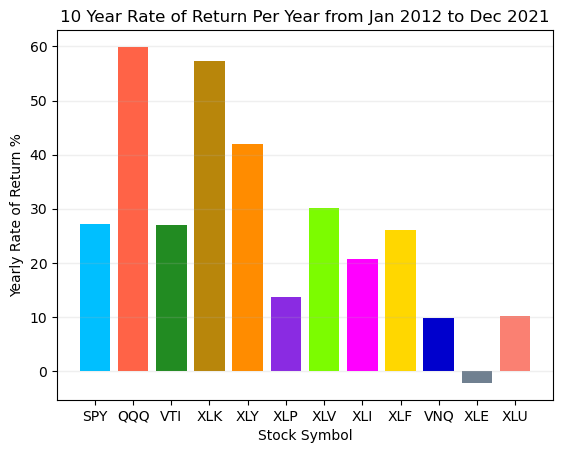

[27.25176404 59.92091308 27.02499706 57.36536176 41.95425931 13.75539211
 30.0939106  20.67845532 26.03489604  9.83415948 -2.18859991 10.25466936]


In [57]:
# Extract the 10 Year Rate of Return and Plot it in a Bar Chart
return_10 = returns_10_5_3_1['10 Year Yearly Rate of Return']
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
# Plot a bar chart using the extracted data from return_10 sourced from returns_10_5_3_1 
plt.bar(return_10.index, return_10.values, color=color)

# Set the title of the chart
plt.title("10 Year Rate of Return Per Year from Jan 2012 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

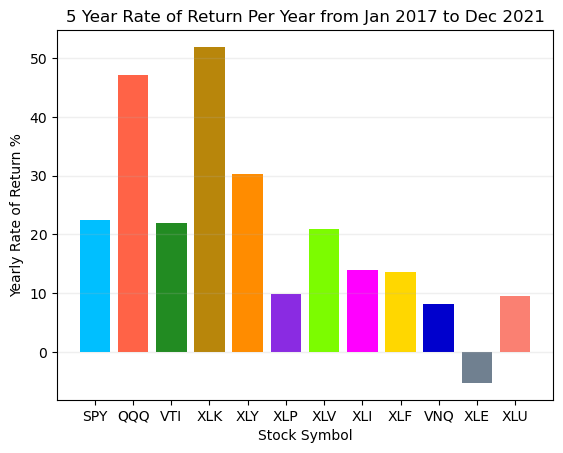

In [43]:
# Extract the 5 Year Rate of Return and Plot it in a Bar Chart
return_5 = returns_10_5_3_1['5 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_5 sourced from returns_10_5_3_1 
plt.bar(return_5.index, return_5.values, color=color)

# Set the title of the chart
plt.title("5 Year Rate of Return Per Year from Jan 2017 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

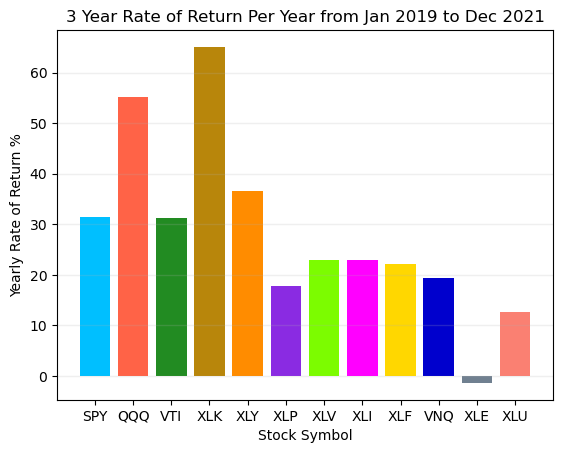

In [44]:
# Extract the 3 Year Rate of Return and Plot it in a Bar Chart
return_3 = returns_10_5_3_1['3 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_3 sourced from returns_10_5_3_1 
plt.bar(return_3.index, return_3.values, color=color)

# Set the title of the chart
plt.title("3 Year Rate of Return Per Year from Jan 2019 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

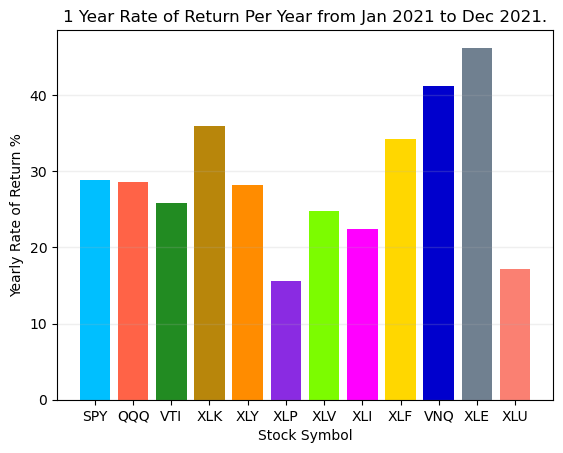

In [45]:
# Extract the 1 Year Rate of Return and Plot it in a Bar Chart
return_1 = returns_10_5_3_1['1 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_1 sourced from returns_10_5_3_1 
plt.bar(return_1.index, return_1.values, color=color)

# Set the title of the chart
plt.title("1 Year Rate of Return Per Year from Jan 2021 to Dec 2021.")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

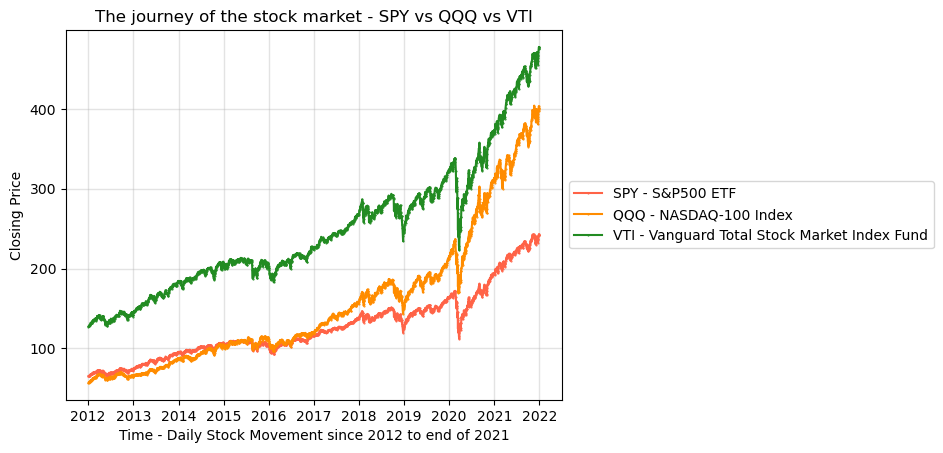

In [46]:
#Plot out the initial info we have to see what we are working with.
marker='o'
color1=['tomato', 'darkorange', 'forestgreen']
for i, ticker in enumerate(tickers1):
    line = data.loc[data["Ticker"] == ticker]
    color2 = color1[i % len(color1)]
    plt.plot(line["Date"], line["Close"], marker=marker, color=color2, markersize=0.5)
    
plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - {' vs '.join(tickers1)}")
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid(linestyle='-', linewidth=1, alpha=0.35)
plt.show()

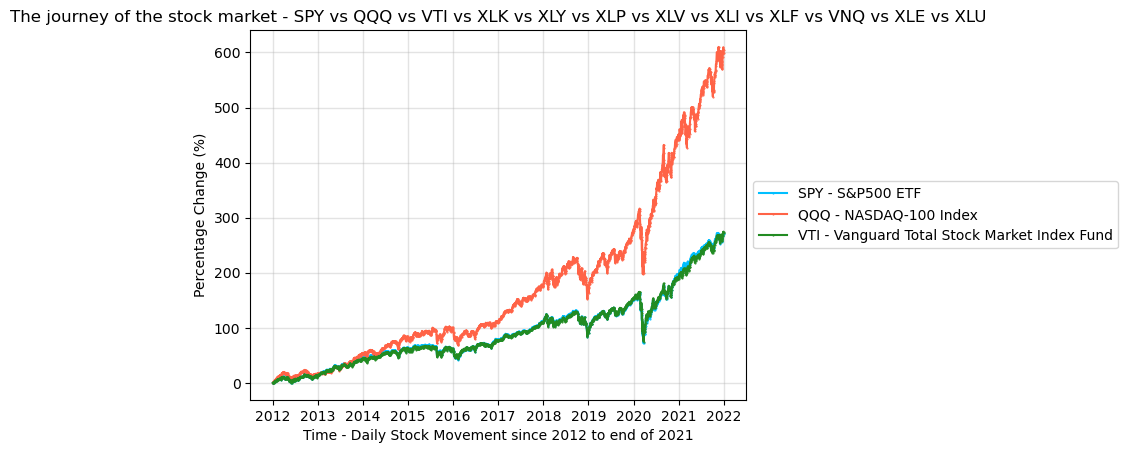

In [47]:
#Plot out the new Cumulative change we calcuated into a Graph that starts at the same point.

color1=['deepskyblue', 'tomato', 'forestgreen']
for i, ticker in enumerate(tickers1):
    line = data.loc[data["Ticker"] == ticker]
    color2 = color1[i % len(color1)]
    plt.plot(line["Date"], line["PercentChange"], marker=marker, color=color2, markersize=0.5)
    
plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - {' vs '.join(stockstring)}")
plt.grid(linestyle='-', linewidth=1, alpha=0.35)
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

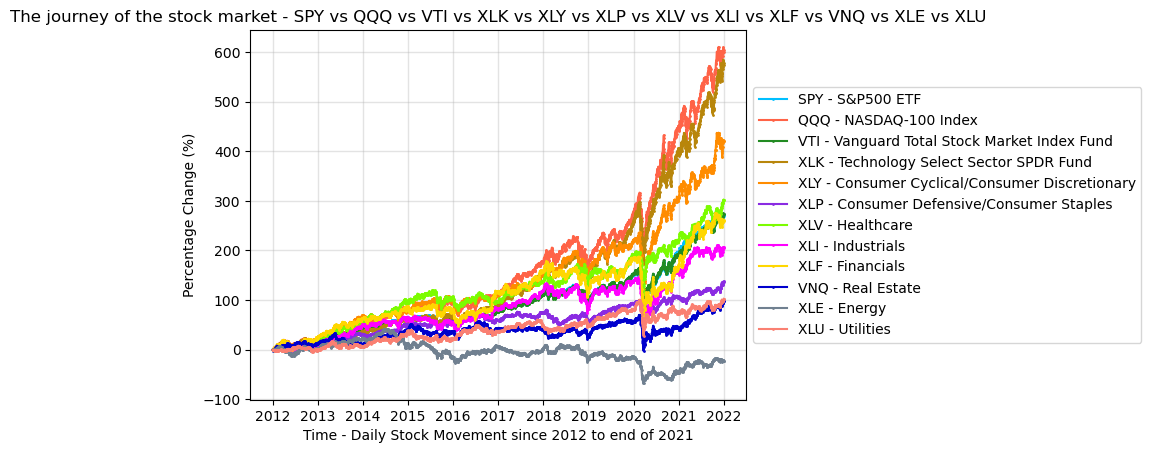

In [48]:
# Starting graphing cumulative change line for all ETFs by different sectors since 2012/01/01
lines = [data.loc[data["Ticker"] == ticker] for ticker in stockstring]
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
for i, ticker in enumerate(stockstring):
    line = data.loc[data["Ticker"] == ticker]
    color3 = color[i % len(color)]
    plt.plot(line["Date"], line["PercentChange"], marker=marker, color=color3, markersize=1)

plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - {' vs '.join(stockstring)}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

In [49]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ     92844825600
SPY      7376731300
VNQ     10915268600
VTI    255384731400
XLE     45659010000
XLF    147718597737
XLI     29505512200
XLK     26103890200
XLP     26990486000
XLU     33853130900
XLV     22985373200
XLY     13776206500
Name: Volume, dtype: int64

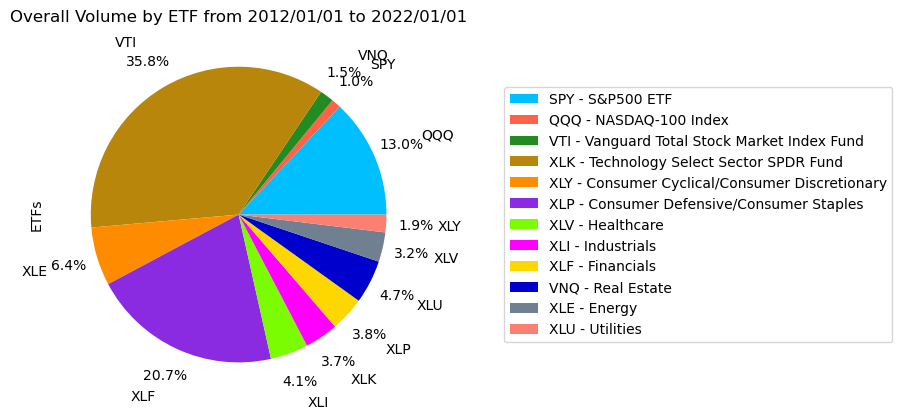

In [50]:
label = count1.index.values
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
plt.pie(count1, labels=label, autopct="%1.1f%%", pctdistance=1.20, labeldistance=1.35, startangle=0, shadow=False, colors=color)
plt.title("Overall Volume by ETF from 2012/01/01 to 2022/01/01")
plt.ylabel("ETFs")
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.2, 0.5))
plt.show()

In [51]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269043,2230400,SPY,0.000000
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293552,1647400,SPY,0.046003
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300,SPY,0.490722
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407913,1640000,SPY,0.260693
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900,SPY,0.490722


In [52]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
2512,2021-12-27 00:00:00-05:00,69.750000,70.059998,69.540001,70.059998,68.021416,7853700,XLU,98.245606
2513,2021-12-28 00:00:00-05:00,70.160004,70.709999,70.110001,70.690002,68.633087,8052000,XLU,100.028303
2514,2021-12-29 00:00:00-05:00,70.769997,71.180000,70.650002,71.070000,69.002022,6877700,XLU,101.103564
2515,2021-12-30 00:00:00-05:00,71.260002,71.400002,70.809998,71.330002,69.254463,9336200,XLU,101.839280
2516,2021-12-31 00:00:00-05:00,71.180000,71.830002,71.040001,71.580002,69.497192,9309400,XLU,102.546694


In [53]:
returns_10_5_3_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, SPY to XLU
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   10 Year Yearly Rate of Return  12 non-null     float64
 1   5 Year Yearly Rate of Return   12 non-null     float64
 2   3 Year Yearly Rate of Return   12 non-null     float64
 3   1 Year Yearly Rate of Return   12 non-null     float64
dtypes: float64(4)
memory usage: 480.0+ bytes


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30204 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype                           
---  ------         --------------  -----                           
 0   Date           30204 non-null  datetime64[ns, America/New_York]
 1   Open           30204 non-null  float64                         
 2   High           30204 non-null  float64                         
 3   Low            30204 non-null  float64                         
 4   Close          30204 non-null  float64                         
 5   Adj Close      30204 non-null  float64                         
 6   Volume         30204 non-null  int64                           
 7   Ticker         30204 non-null  object                          
 8   PercentChange  30204 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 2.3+ MB


In [54]:
# look at stats to see if anything additional pops out from our data set.
returns_10_5_3_1.describe()

,10 Year Yearly Rate of Return,5 Year Yearly Rate of Return,3 Year Yearly Rate of Return,1 Year Yearly Rate of Return
count,12.000000,12.000000,12.000000,12.000000
mean,26.831682,20.357633,27.972204,29.081606
std,18.786183,16.348591,18.028319,9.115173
min,-2.188600,-5.262878,-1.381693,15.572541
25%,12.880211,9.736761,18.950353,24.165233
50%,26.529947,17.442396,22.893160,28.432440
75%,33.058998,24.429971,32.744354,34.699081
max,59.920913,51.906531,65.081789,46.206537


In [59]:
# Last check of Data to make sure counts etc arent out of order and nothing jumps out as an error.
data.describe()

,Open,High,Low,Close,Adj Close,Volume,PercentChange
count,30204.000000,30204.000000,30204.000000,30204.000000,30204.000000,3.020400e+04,30204.000000
mean,91.909244,92.442872,91.324879,91.922110,83.007658,2.360991e+07,91.910833
std,70.938949,71.310774,70.515301,70.951362,69.416935,3.350156e+07,93.697883
min,10.706742,10.844842,10.658002,10.804224,8.771101,5.524000e+05,-66.826181
25%,49.847499,50.169998,49.509998,49.830002,42.269085,5.554200e+06,30.063188
50%,71.220001,71.645000,70.769997,71.239998,60.642252,1.055640e+07,66.909486
75%,105.220001,105.860001,104.652502,105.260002,98.596525,2.551400e+07,124.514478
max,477.929993,479.000000,476.059998,477.480011,469.857391,5.072443e+08,609.999964


In [55]:
QQQ.tail(252)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
2265,2021-01-04 00:00:00-05:00,315.109985,315.290009,305.179993,309.309998,305.575043,45305900,QQQ,443.602793
2266,2021-01-05 00:00:00-05:00,308.290009,312.140015,308.290009,311.859985,308.094238,29323400,QQQ,448.084318
2267,2021-01-06 00:00:00-05:00,307.000000,311.880005,305.980011,307.540009,303.826416,52809600,QQQ,440.492092
2268,2021-01-07 00:00:00-05:00,310.279999,315.839996,310.250000,314.980011,311.176636,30394800,QQQ,453.567667
2269,2021-01-08 00:00:00-05:00,317.339996,319.390015,315.079987,319.029999,315.177673,33955800,QQQ,460.685396
...,...,...,...,...,...,...,...,...,...
2512,2021-12-27 00:00:00-05:00,398.250000,403.480011,398.220001,403.480011,400.528259,32820700,QQQ,609.103691
2513,2021-12-28 00:00:00-05:00,404.399994,404.579987,400.709991,401.609985,398.671906,33113700,QQQ,605.817179
2514,2021-12-29 00:00:00-05:00,401.750000,403.049988,399.109985,401.549988,398.612366,32248500,QQQ,605.711735
2515,2021-12-30 00:00:00-05:00,401.329987,403.570007,399.750000,400.350006,397.421143,23850100,QQQ,603.602804


The correlation between the Percent Change and the Volume is 0.03
The r-squared is: 0.001


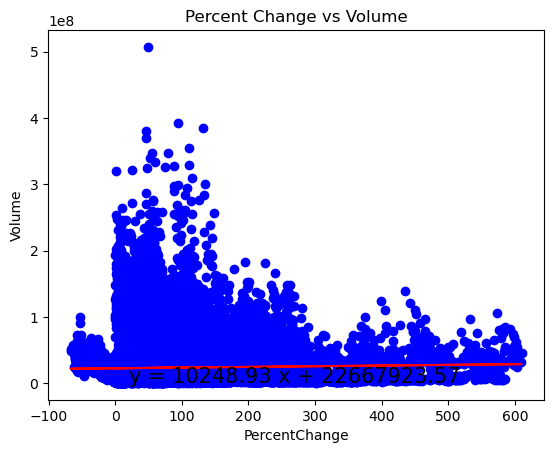

In [56]:
# # Calculate the correlation coefficient and linear regression model
# correlation = st.pearsonr(data['PercentChange'],data['Volume'])
# print(f"The correlation between the Percent Change and the Volume is {round(correlation[0],2)}")
# #Correlation graph
# (slope, intercept,rvalue, pvalue, stderr)= st.linregress(data['PercentChange'],data['Volume'])
# regress_values=data["PercentChange"]* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
# plt.scatter(data["PercentChange"],data["Volume"],color='b')
# plt.plot(data["PercentChange"], regress_values, color='red')
# plt.annotate(line_eq,(20,36), fontsize=15)
# plt.xlabel("PercentChange")
# plt.ylabel("Volume")
# plt.title("Percent Change vs Volume")
# print(f"The r-squared is: {round(rvalue**2,3)}")
# plt.show()